In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


**bold text**#Datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/MyDrive/TRAIN/"
!ls "/content/drive/MyDrive/TEST/"



'Data Dictionary.xlsx'		   TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
 SAMPLE_SUBMISSION.xlsx		   TRAINING_SOLUTIONS.xlsx
 TRAIN_CATEGORICAL_METADATA.xlsx   TRAIN_QUANTITATIVE_METADATA.xlsx
TEST_CATEGORICAL.xlsx  TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv	TEST_QUANTITATIVE_METADATA.xlsx


In [4]:
import pandas as pd

train_categorical = pd.read_excel('/content/drive/MyDrive/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
train_quantitative = pd.read_excel('/content/drive/MyDrive/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')
train_functional_connectome = pd.read_csv('/content/drive/MyDrive/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
training_solutions = pd.read_excel('/content/drive/MyDrive/TRAIN/TRAINING_SOLUTIONS.xlsx')





```
# This is formatted as code
```

# TRAIN Categorical

In [5]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [6]:
train_categorical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [7]:
train_categorical.isna().sum()

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,11
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


In [8]:
missing_ethnicity = train_categorical[train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].isna()]
print(missing_ethnicity[['participant_id','PreInt_Demos_Fam_Child_Race','PreInt_Demos_Fam_Child_Ethnicity']])

    participant_id  PreInt_Demos_Fam_Child_Race  \
50    r44YD9eIqJ9u                            0   
54    VZnIq2hRErI5                            0   
103   cI2963FmxJti                            4   
122   SZxlsOgwVT6D                            0   
196   LPWm6w5QXeev                            0   
198   ZrR6qlydACvG                            1   
205   fcdnxcFP1pc8                            0   
242   poHMFSF8wp2r                            8   
286   SMmWtby1jwjx                            0   
322   N9WXo2Q6jzKk                            1   
332   X5zXVOqKvSjp                            0   

     PreInt_Demos_Fam_Child_Ethnicity  
50                                NaN  
54                                NaN  
103                               NaN  
122                               NaN  
196                               NaN  
198                               NaN  
205                               NaN  
242                               NaN  
286                        

In [9]:
#fixing the ethnicity so there is no missing values, will make a copy
# instead of NaN will put 2: decline to specify

train_categorical_copy = train_categorical.copy()
train_categorical_copy['PreInt_Demos_Fam_Child_Ethnicity'] = train_categorical_copy['PreInt_Demos_Fam_Child_Ethnicity'].fillna(2.0)

In [10]:
train_categorical_copy.isna().sum()

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,0
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


In [11]:
for col in train_categorical_copy.columns:
  unique_val_train_categroical_copy = train_categorical_copy[col].unique()
  nunique_val_train_categroical_copy = train_categorical_copy[col].nunique()

  print(f"Unique values in column '{col}' : {unique_val_train_categroical_copy}\n")
  print(f"Number of unique values in column '{col}' : {nunique_val_train_categroical_copy}\n")


Unique values in column 'participant_id' : ['UmrK0vMLopoR' 'CPaeQkhcjg7d' 'Nb4EetVPm3gs' ... 'zmxGvIrOD0bt'
 'rOmWFuJCud5G' 'k8HhHnnu2wmt']

Number of unique values in column 'participant_id' : 1213

Unique values in column 'Basic_Demos_Enroll_Year' : [2016 2019 2018 2015 2017 2020]

Number of unique values in column 'Basic_Demos_Enroll_Year' : 6

Unique values in column 'Basic_Demos_Study_Site' : [1 3 4 2]

Number of unique values in column 'Basic_Demos_Study_Site' : 4

Unique values in column 'PreInt_Demos_Fam_Child_Ethnicity' : [0. 1. 3. 2.]

Number of unique values in column 'PreInt_Demos_Fam_Child_Ethnicity' : 4

Unique values in column 'PreInt_Demos_Fam_Child_Race' : [ 0  2  8  1  3  9 10  4 11  7]

Number of unique values in column 'PreInt_Demos_Fam_Child_Race' : 10

Unique values in column 'MRI_Track_Scan_Location' : [1 3 2 4 0]

Number of unique values in column 'MRI_Track_Scan_Location' : 5

Unique values in column 'Barratt_Barratt_P1_Edu' : [21 15 18 12  9  0  3  6]

Number 

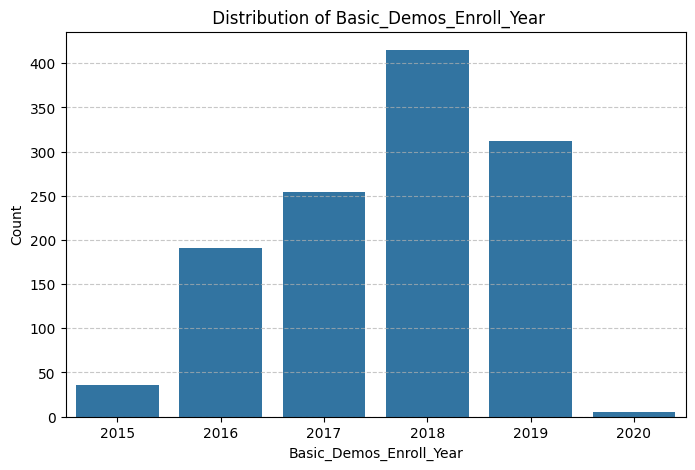

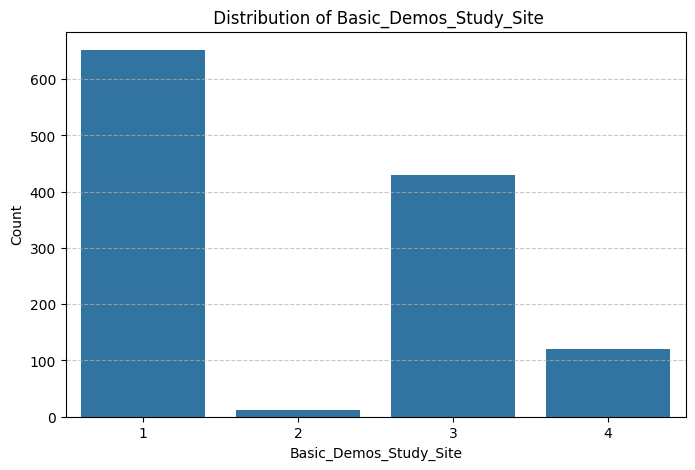

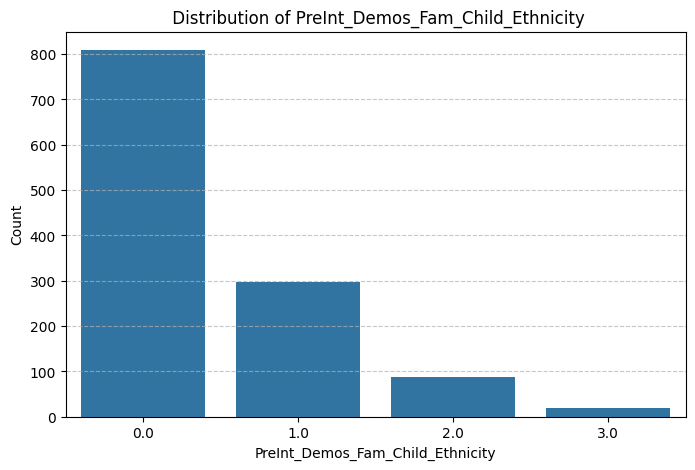

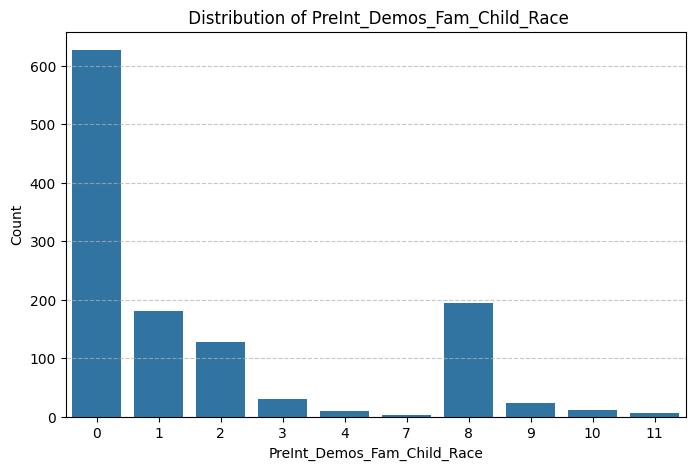

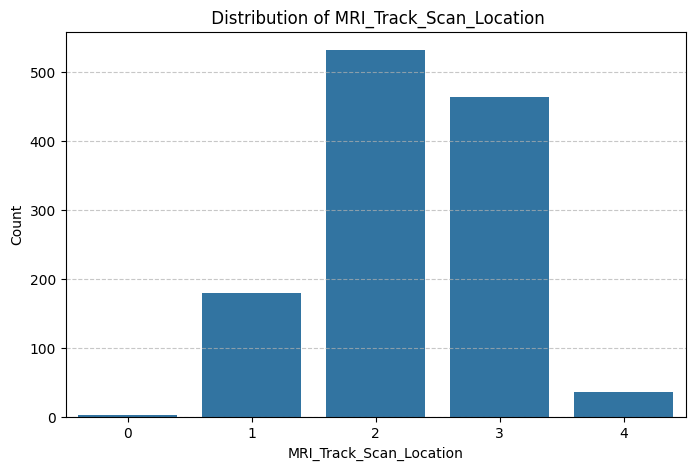

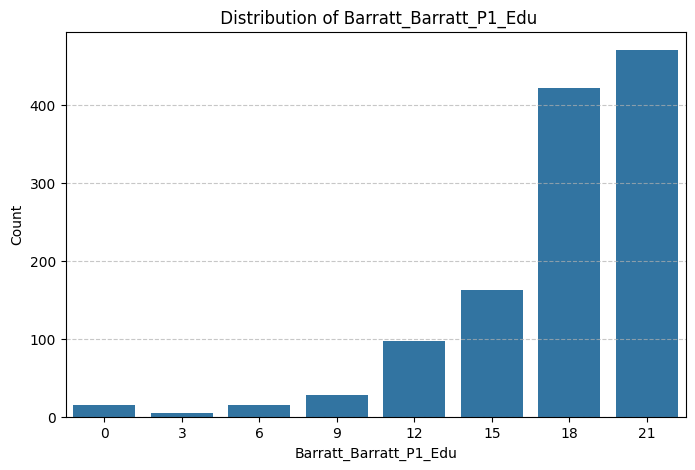

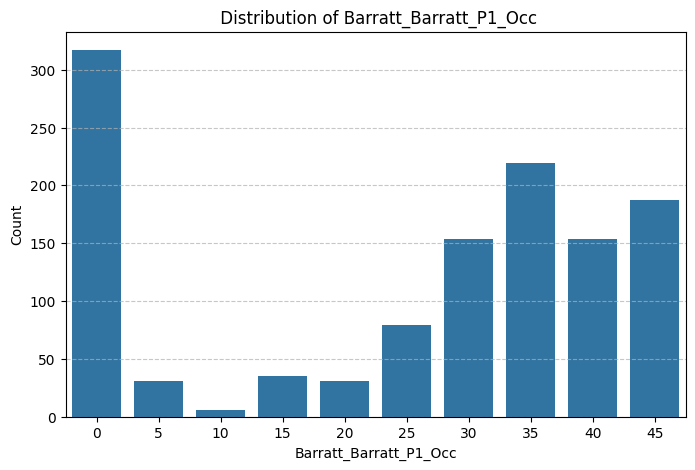

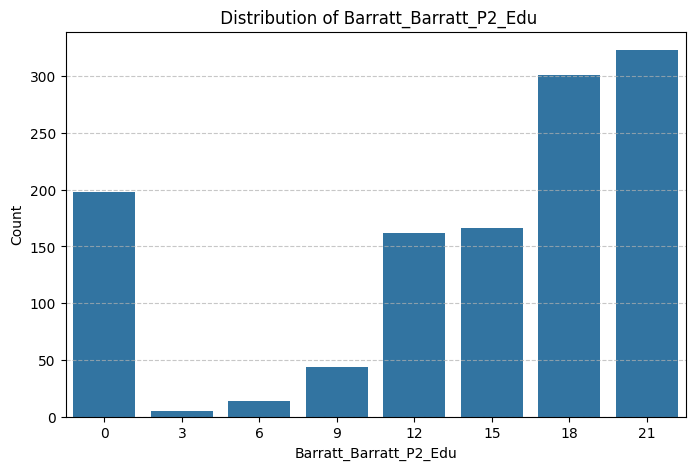

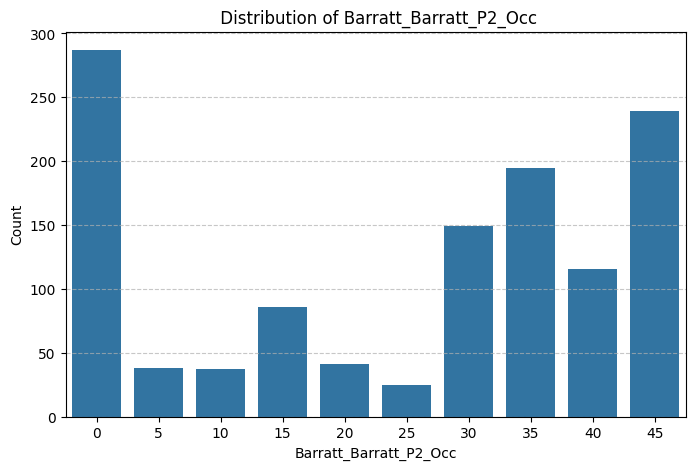

In [12]:
for col in train_categorical_copy.columns:
  if train_categorical_copy[col].dtype == 'int' or train_categorical_copy[col].dtype =='float':
    plt.figure(figsize=(8, 5))
    sns.countplot(x = train_categorical_copy[col])
    plt.title(f" Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

<Axes: ylabel='count'>

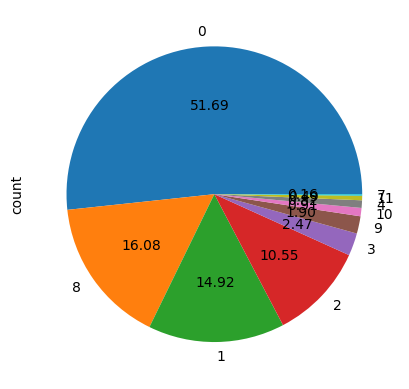

In [13]:
train_categorical_copy['PreInt_Demos_Fam_Child_Race'].value_counts().plot.pie(autopct='%.2f')

In [14]:
train_categorical_copy.dtypes

,0
participant_id,object
Basic_Demos_Enroll_Year,int64
Basic_Demos_Study_Site,int64
PreInt_Demos_Fam_Child_Ethnicity,float64
PreInt_Demos_Fam_Child_Race,int64
MRI_Track_Scan_Location,int64
Barratt_Barratt_P1_Edu,int64
Barratt_Barratt_P1_Occ,int64
Barratt_Barratt_P2_Edu,int64
Barratt_Barratt_P2_Occ,int64


In [15]:
#one hot encoding train quantitvative
#selecting columns to one hot encode
for col in train_categorical_copy.select_dtypes(include='int').columns:
  train_categorical_copy[col] = train_categorical_copy[col].astype('object')
cols_encode = train_categorical_copy.columns[1:].tolist()
print(cols_encode)

['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [16]:
#encoding categorical data
train_categorical_encoded = pd.get_dummies(train_categorical_copy[cols_encode],drop_first=True)
train_categorical_encoded = train_categorical_encoded.applymap(lambda x:1 if x is True else(0 if x is False else x))
train_categorical_encoded.head()
#reintroducting the participant_id
final_train_cat_encoded = pd.concat([train_categorical_copy.drop(columns=cols_encode),train_categorical_encoded],axis=1)
final_train_cat_encoded.head()

<ipython-input-16-59347151237c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_categorical_encoded = train_categorical_encoded.applymap(lambda x:1 if x is True else(0 if x is False else x))


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Train Quantitative


In [17]:
train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


 Edinburgh Inventory (EHQ_EHQ_Total) is a psychological examination that quantifies a person's hand dominance.

 APQ (Alabama Parenting Quesetionnaire)

 SDQ (Stregnths and Difficulties Questionnaire)

In [18]:
train_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [19]:
for col in train_quantitative.columns:
  unique_val_train_quantitative = train_quantitative[col].unique()
  nunique_val_train_quantitative = train_quantitative[col].nunique()

  print(f"Unique values in column '{col}' : {unique_val_train_quantitative}\n")
  print(f"Number of unique values in column '{col}' : {nunique_val_train_quantitative}\n")


Unique values in column 'participant_id' : ['UmrK0vMLopoR' 'CPaeQkhcjg7d' 'Nb4EetVPm3gs' ... 'zmxGvIrOD0bt'
 'rOmWFuJCud5G' 'k8HhHnnu2wmt']

Number of unique values in column 'participant_id' : 1213

Unique values in column 'EHQ_EHQ_Total' : [  40.    -94.47  -46.67  -26.68    0.     83.34   94.47   60.     73.34
   66.67   31.13   66.74   76.67   50.     86.67   80.     11.14   83.4
  100.    -80.     20.     71.14   70.    -73.34   46.67   91.14   17.81
   93.34   -2.2   -53.34   54.54   85.6    77.8   -20.     96.67   97.8
  -86.67   51.2   -66.67   53.34   52.34    2.2    26.68   28.88  -16.68
  -64.47   67.8    33.35   63.34   -7.8    43.35  -82.2    88.94  -40.
   45.6   -51.14 -100.     90.    -60.    -93.34    6.67   95.6    62.27
  -37.8    13.34  -91.14   56.67  -55.67   81.14   44.47   61.14  -44.47
   14.47   57.8    60.07   48.87  -23.33   64.47   12.2    41.15   36.67
   68.94   54.47  -10.07   58.87   27.81   -6.67   73.4     3.34   51.14
  -13.34   84.47   75.6   -33.35

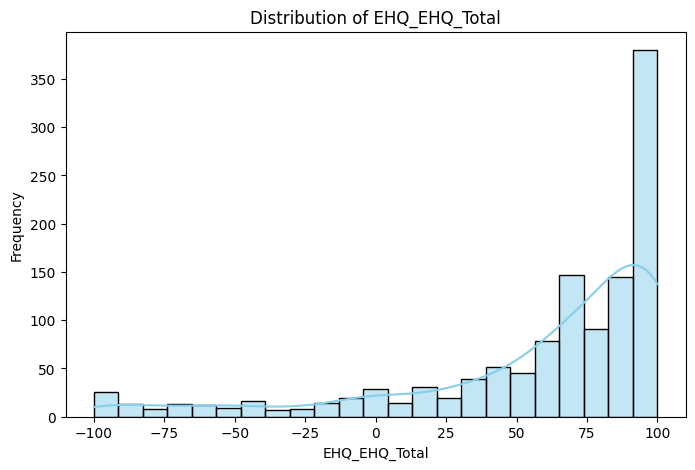

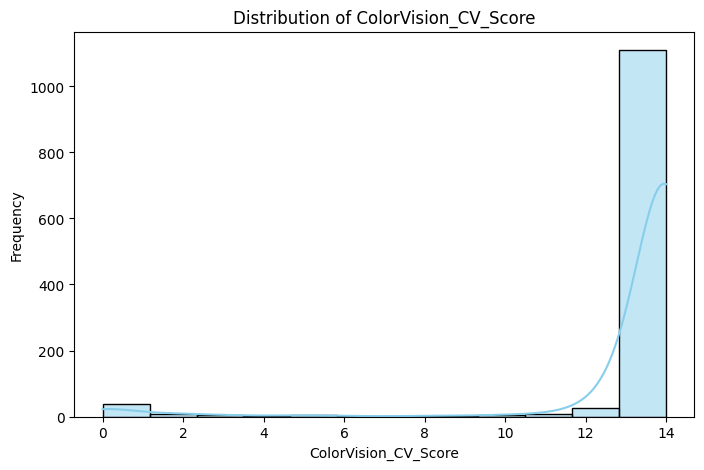

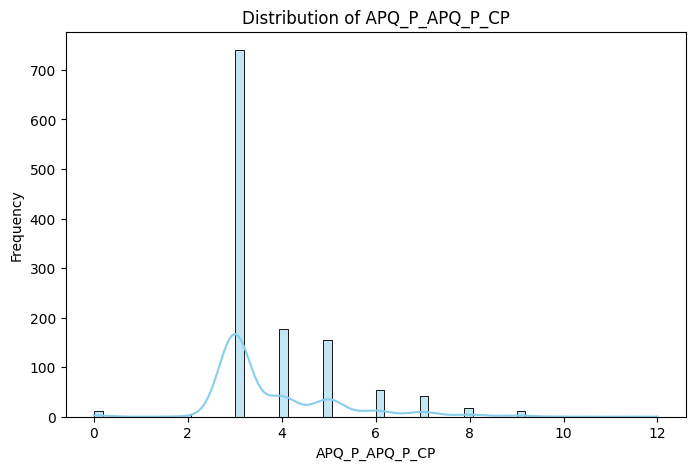

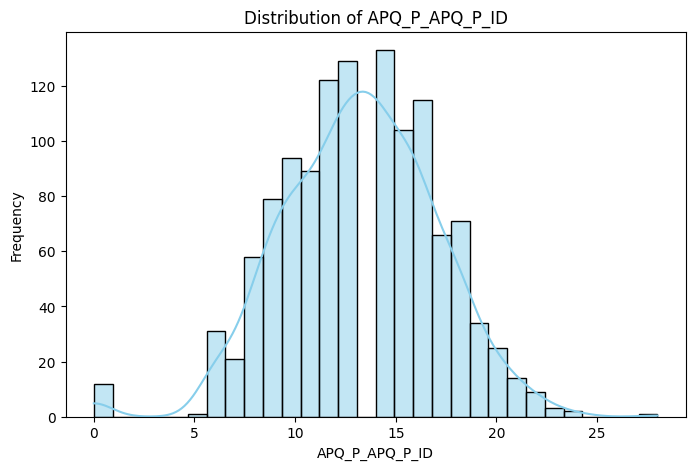

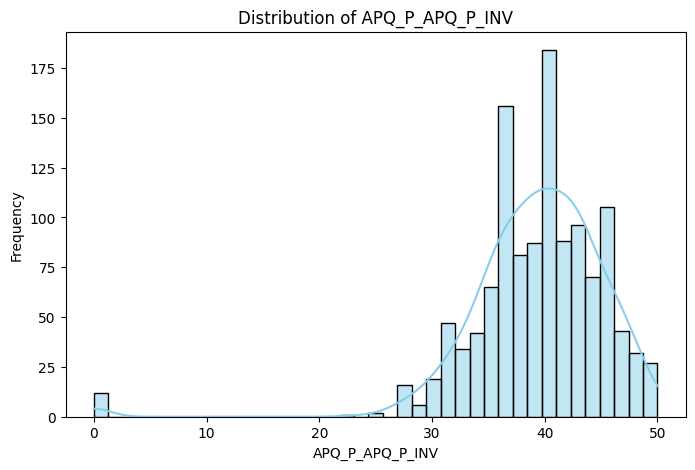

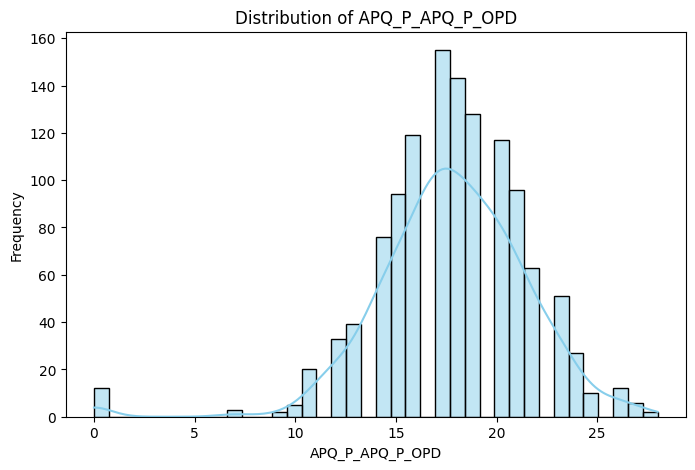

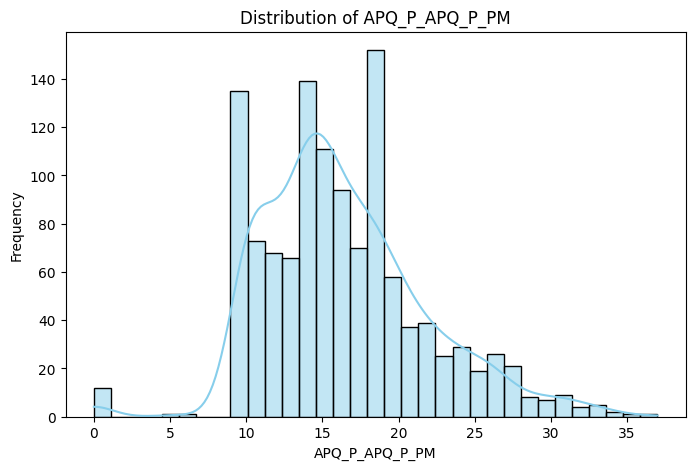

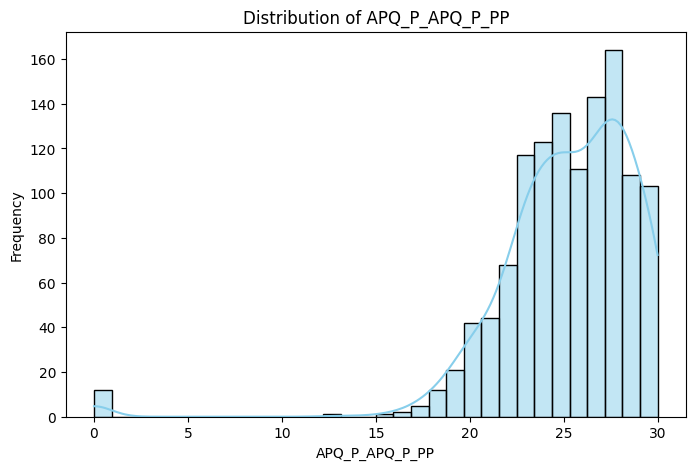

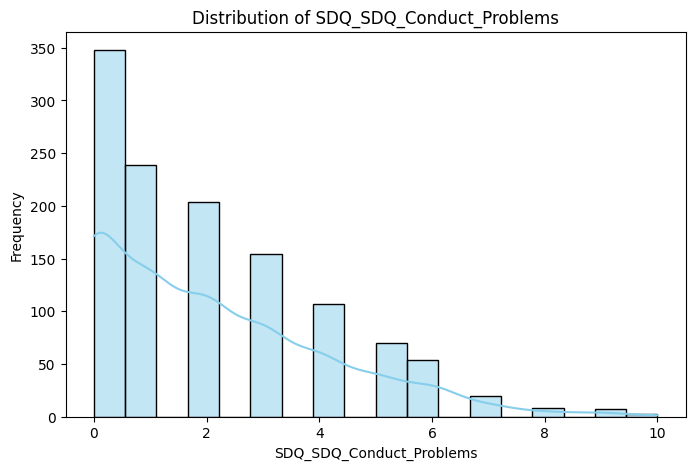

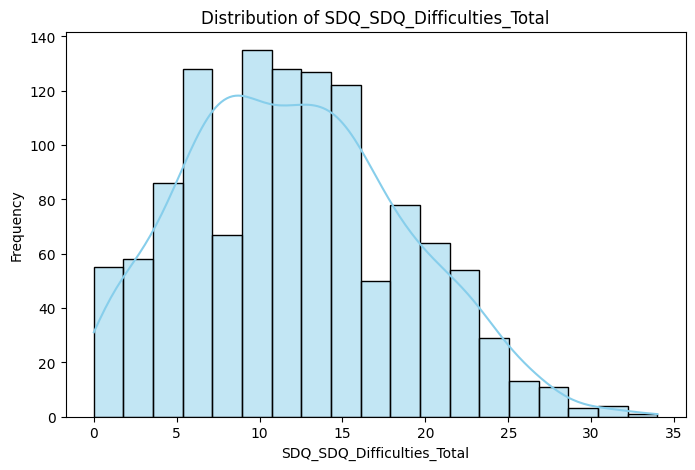

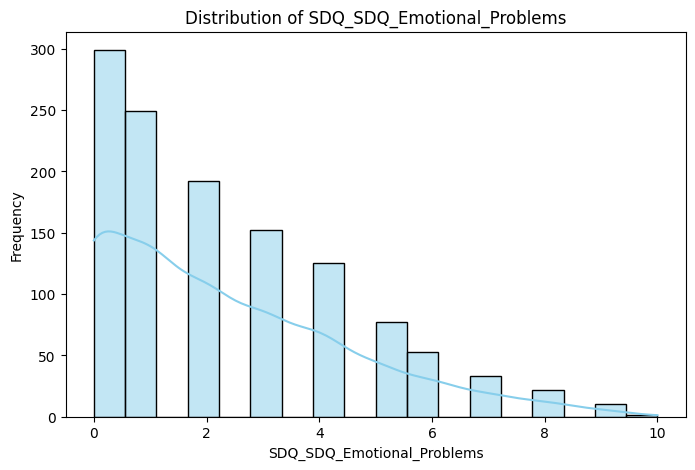

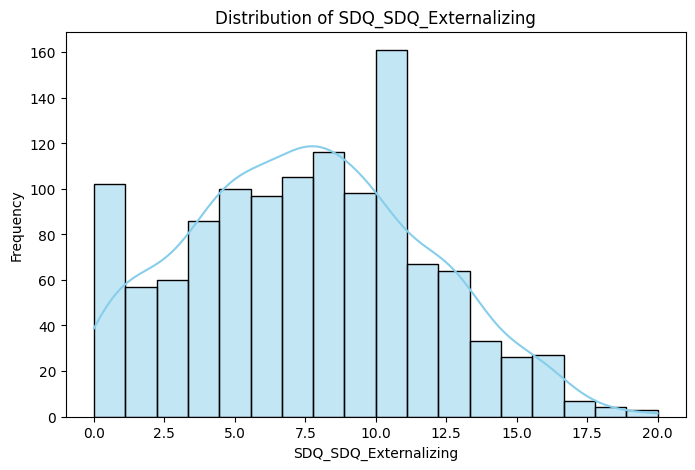

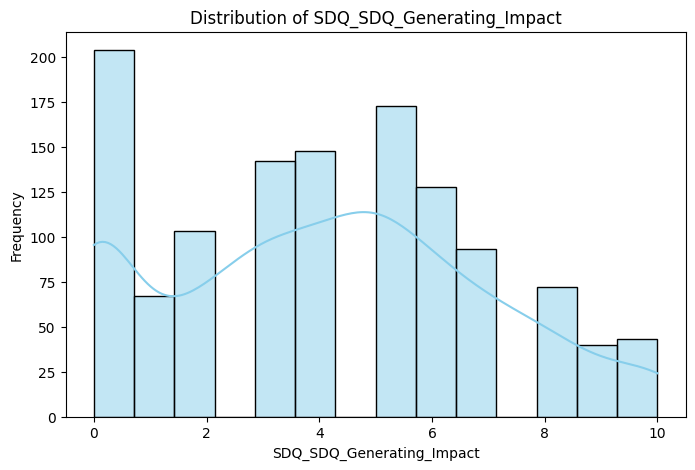

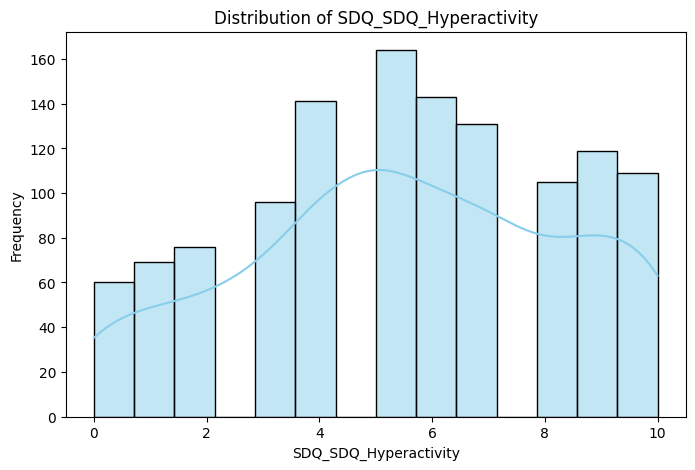

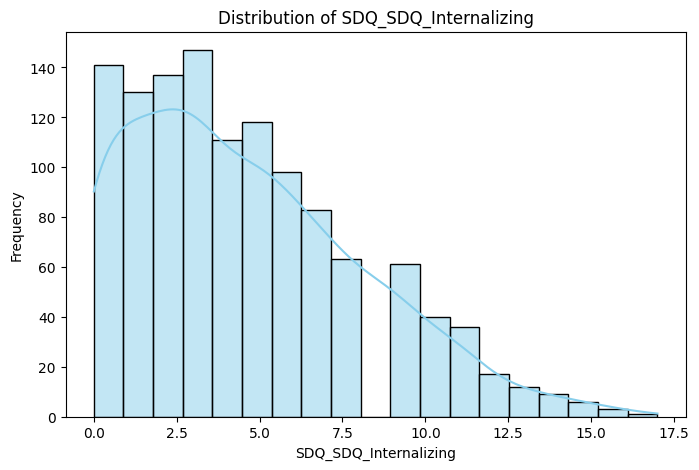

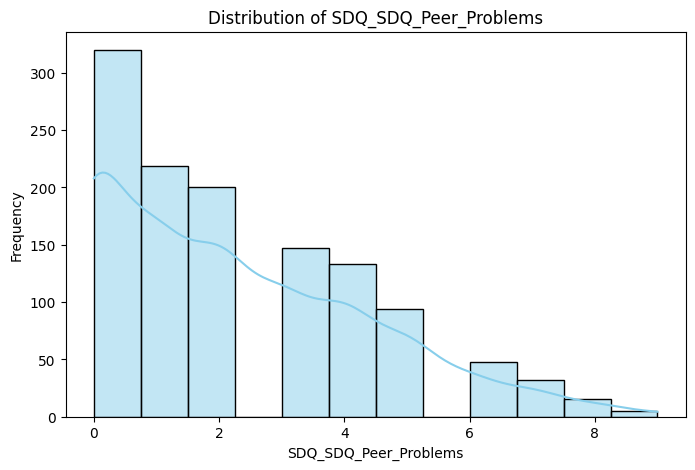

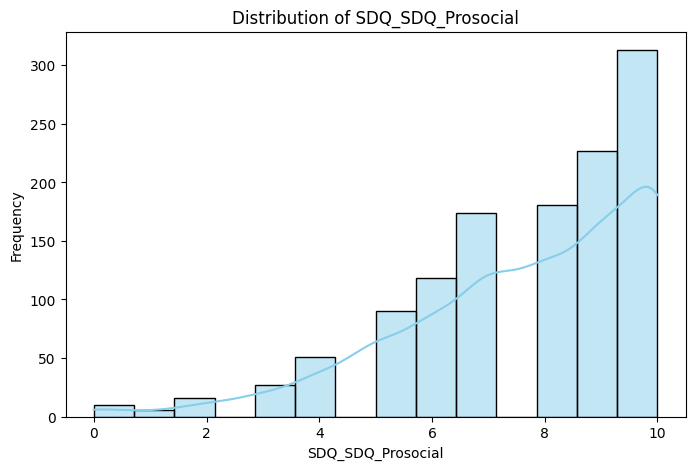

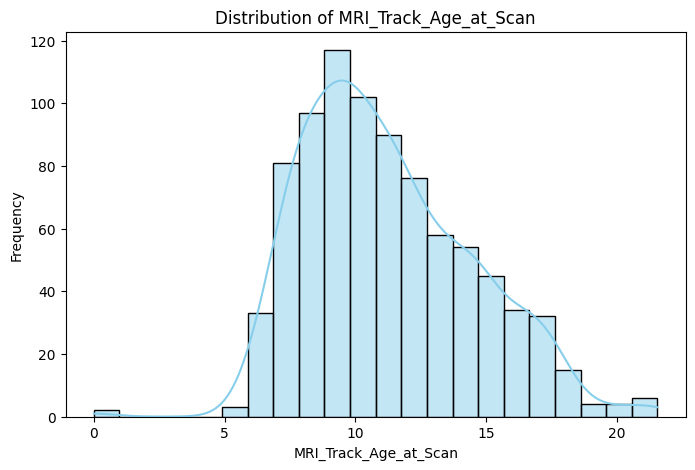

In [20]:
#seeing the distribuiton
for col in train_quantitative.columns:
  if train_quantitative[col].dtype == 'int' or train_quantitative[col].dtype == "float":
    plt.figure(figsize=(8,5))
    sns.histplot(train_quantitative[col], kde=True, color = 'skyblue',)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show

In [21]:
print(f"min age",train_quantitative['MRI_Track_Age_at_Scan'].min())
print(f"max age",train_quantitative['MRI_Track_Age_at_Scan'].max())

min age 0.0
max age 21.564453


In [22]:
train_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


In [23]:
#replacing with mean MRI_Track_Age_at_Scan
for colname in train_quantitative.columns:
  if train_quantitative[colname].isna().sum() > 0:
    train_quantitative[colname].fillna(train_quantitative[colname].mean(), inplace=True)

<ipython-input-23-215819e48841>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_quantitative[colname].fillna(train_quantitative[colname].mean(), inplace=True)


In [24]:
train_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


# Connectome

In [25]:
train_functional_connectome.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [26]:
train_functional_connectome.info()
print(train_functional_connectome.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB
Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)


In [27]:
train_functional_connectome.isna().sum().sum() #no missing values here

np.int64(0)

In [28]:
#turn a row into matrix just to see

# Training Solution

In [29]:
training_solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [30]:
training_solutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


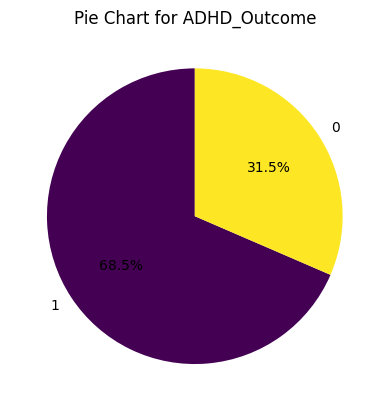

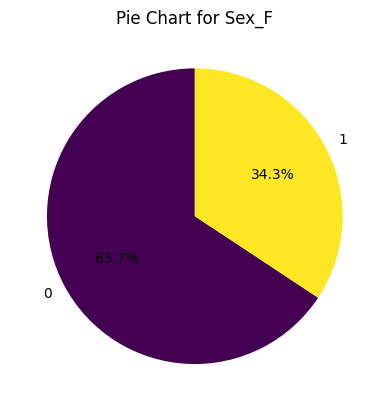

In [31]:
for col in training_solutions.columns:
  if(training_solutions[col].dtype == 'int'):
    training_solutions[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')
    plt.show()

There is a lot more females than males, and there is alot more adhd. Time to merge the dataframes together and deal with the null variables when it comes to MRI scans as there was alot of null for that

# Merging Train Data frame

In [32]:
merged_df = pd.merge(train_quantitative, training_solutions, on='participant_id', how='outer')
merged_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,100.00,13,3,15,44,14,20,27,3,...,4,11,5,8,6,2,9,14.274127,1,0
1,00fV0OyyoLfw,92.27,14,3,12,35,25,28,30,5,...,4,13,5,8,7,3,8,11.245678,1,0
2,04X1eiS79T4B,86.67,14,3,21,37,18,26,28,3,...,7,10,10,7,14,7,7,13.463381,0,1
3,05ocQutkURd6,93.34,14,3,11,42,15,20,28,0,...,0,3,0,3,2,2,6,9.572553,0,1
4,06YUNBA9ZRLq,0.00,14,8,12,35,22,12,24,6,...,7,15,8,9,8,1,4,6.654574,1,0


In [33]:
merged_df.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


In [34]:
merge_df2 = pd.merge(merged_df,train_categorical_copy, on='participant_id', how='outer')
merge_df2.head()
#this is to check for correlation because cant have encoded columns

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,Sex_F,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,100.00,13,3,15,44,14,20,27,3,...,0,2019,4,1.0,0,3,21,45,0,0
1,00fV0OyyoLfw,92.27,14,3,12,35,25,28,30,5,...,0,2017,1,0.0,9,2,21,0,21,45
2,04X1eiS79T4B,86.67,14,3,21,37,18,26,28,3,...,1,2017,1,1.0,2,2,9,0,0,0
3,05ocQutkURd6,93.34,14,3,11,42,15,20,28,0,...,1,2018,1,3.0,8,2,18,10,18,0
4,06YUNBA9ZRLq,0.00,14,8,12,35,22,12,24,6,...,0,2018,1,0.0,1,2,12,0,0,0


In [35]:
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   EHQ_EHQ_Total                     1213 non-null   float64
 2   ColorVision_CV_Score              1213 non-null   int64  
 3   APQ_P_APQ_P_CP                    1213 non-null   int64  
 4   APQ_P_APQ_P_ID                    1213 non-null   int64  
 5   APQ_P_APQ_P_INV                   1213 non-null   int64  
 6   APQ_P_APQ_P_OPD                   1213 non-null   int64  
 7   APQ_P_APQ_P_PM                    1213 non-null   int64  
 8   APQ_P_APQ_P_PP                    1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems          1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total        1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems        1213 non-null   int64  
 12  SDQ_SD

# Correlation Matrix

In [36]:
numeric_df = merge_df2.drop(columns='participant_id')
numeric_df.corr()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Sex_F,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
EHQ_EHQ_Total,1.000000,0.027679,-0.013414,0.019131,0.033819,-0.012423,0.049200,0.020321,-0.051240,-0.054827,...,-0.000444,0.060649,0.034135,-0.019717,-0.038287,0.057344,0.063649,0.048844,0.029075,0.017611
ColorVision_CV_Score,0.027679,1.000000,0.066965,0.022960,0.007465,0.023402,-0.013446,0.029796,0.016444,0.000335,...,0.078360,0.122806,0.084179,0.036551,-0.006766,0.119846,0.033545,-0.010432,-0.002407,-0.008968
APQ_P_APQ_P_CP,-0.013414,0.066965,1.000000,0.315148,0.089254,0.379770,0.138122,0.151907,0.206375,0.187030,...,-0.041795,-0.033205,-0.073423,0.032705,0.077534,-0.042310,-0.064058,-0.062776,-0.090773,-0.109918
APQ_P_APQ_P_ID,0.019131,0.022960,0.315148,1.000000,0.063517,0.398303,0.290048,0.141616,0.262340,0.244832,...,-0.028896,0.069347,0.060696,-0.071756,-0.073331,0.074827,-0.014470,0.011972,-0.008488,0.005985
APQ_P_APQ_P_INV,0.033819,0.007465,0.089254,0.063517,1.000000,0.293751,0.036298,0.739292,-0.150160,-0.135987,...,-0.070571,0.038358,-0.002530,-0.023972,-0.020357,-0.008883,0.021303,-0.025925,0.037856,0.069025
APQ_P_APQ_P_OPD,-0.012423,0.023402,0.379770,0.398303,0.293751,1.000000,0.172204,0.383299,0.298944,0.273078,...,-0.069159,-0.024302,-0.028799,0.042568,0.015031,-0.041906,-0.084252,-0.022503,-0.084387,-0.050077
APQ_P_APQ_P_PM,0.049200,-0.013446,0.138122,0.290048,0.036298,0.172204,1.000000,0.097627,0.085674,0.031272,...,-0.016023,0.017627,0.041083,0.011566,0.004726,0.046815,-0.030575,0.034573,-0.080957,-0.049072
APQ_P_APQ_P_PP,0.020321,0.029796,0.151907,0.141616,0.739292,0.383299,0.097627,1.000000,-0.063663,-0.028697,...,-0.075003,0.007260,-0.045158,0.029478,0.008041,-0.032849,-0.082807,0.007201,-0.045114,-0.010961
SDQ_SDQ_Conduct_Problems,-0.051240,0.016444,0.206375,0.262340,-0.150160,0.298944,0.085674,-0.063663,1.000000,0.725036,...,-0.051258,-0.062103,-0.035948,0.034593,-0.003198,-0.053114,-0.048998,-0.030951,-0.080004,-0.065779
SDQ_SDQ_Difficulties_Total,-0.054827,0.000335,0.187030,0.244832,-0.135987,0.273078,0.031272,-0.028697,0.725036,1.000000,...,-0.047839,-0.045502,-0.018368,0.038621,-0.002459,-0.035895,-0.091362,-0.042506,-0.090067,-0.095873


In [37]:
corrs_ADHD = numeric_df.corr()['ADHD_Outcome']
corrs_sorted = corrs_ADHD.sort_values(ascending=False)
corrs_sorted

,ADHD_Outcome
ADHD_Outcome,1.000000
SDQ_SDQ_Hyperactivity,0.555330
SDQ_SDQ_Externalizing,0.512610
SDQ_SDQ_Difficulties_Total,0.463507
SDQ_SDQ_Generating_Impact,0.410587
SDQ_SDQ_Conduct_Problems,0.277026
SDQ_SDQ_Internalizing,0.259324
SDQ_SDQ_Peer_Problems,0.221330
SDQ_SDQ_Emotional_Problems,0.207633
Basic_Demos_Enroll_Year,0.166252


In [38]:
corrs_Sex_F = numeric_df.corr()['Sex_F']
corrs_sorted_sex = corrs_Sex_F.sort_values(ascending=False)
corrs_sorted_sex

,Sex_F
Sex_F,1.000000
SDQ_SDQ_Prosocial,0.111603
SDQ_SDQ_Emotional_Problems,0.105869
ColorVision_CV_Score,0.078360
SDQ_SDQ_Internalizing,0.054663
Barratt_Barratt_P1_Occ,0.054042
Barratt_Barratt_P1_Edu,0.045200
EHQ_EHQ_Total,-0.000444
Barratt_Barratt_P2_Edu,-0.004526
PreInt_Demos_Fam_Child_Race,-0.005825


In [39]:
encoded_df = pd.merge(merged_df,final_train_cat_encoded, on='participant_id', how='outer')
encoded_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,00aIpNTbG5uh,100.00,13,3,15,44,14,20,27,3,...,0,0,0,0,0,0,0,0,0,0
1,00fV0OyyoLfw,92.27,14,3,12,35,25,28,30,5,...,1,0,0,0,0,0,0,0,0,1
2,04X1eiS79T4B,86.67,14,3,21,37,18,26,28,3,...,0,0,0,0,0,0,0,0,0,0
3,05ocQutkURd6,93.34,14,3,11,42,15,20,28,0,...,0,0,0,0,0,0,0,0,0,0
4,06YUNBA9ZRLq,0.00,14,8,12,35,22,12,24,6,...,0,0,0,0,0,0,0,0,0,0


In [40]:
print(final_train_cat_encoded.columns)

Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity',
       'Basic_Demos_Enroll_Year_2016', 'Basic_Demos_Enroll_Year_2017',
       'Basic_Demos_Enroll_Year_2018', 'Basic_Demos_Enroll_Year_2019',
       'Basic_Demos_Enroll_Year_2020', 'Basic_Demos_Study_Site_2',
       'Basic_Demos_Study_Site_3', 'Basic_Demos_Study_Site_4',
       'PreInt_Demos_Fam_Child_Race_1', 'PreInt_Demos_Fam_Child_Race_2',
       'PreInt_Demos_Fam_Child_Race_3', 'PreInt_Demos_Fam_Child_Race_4',
       'PreInt_Demos_Fam_Child_Race_7', 'PreInt_Demos_Fam_Child_Race_8',
       'PreInt_Demos_Fam_Child_Race_9', 'PreInt_Demos_Fam_Child_Race_10',
       'PreInt_Demos_Fam_Child_Race_11', 'MRI_Track_Scan_Location_1',
       'MRI_Track_Scan_Location_2', 'MRI_Track_Scan_Location_3',
       'MRI_Track_Scan_Location_4', 'Barratt_Barratt_P1_Edu_3',
       'Barratt_Barratt_P1_Edu_6', 'Barratt_Barratt_P1_Edu_9',
       'Barratt_Barratt_P1_Edu_12', 'Barratt_Barratt_P1_Edu_15',
       'Barratt_Barratt_P1_Edu_18', 'Barratt_Ba

In [41]:
#adding the connectome
finalized_TRAIN_df = pd.merge(merge_df2, train_functional_connectome, on='participant_id', how='outer')
finalized_TRAIN_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,00aIpNTbG5uh,100.00,13,3,15,44,14,20,27,3,...,0.066630,0.053134,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368
1,00fV0OyyoLfw,92.27,14,3,12,35,25,28,30,5,...,0.050297,-0.063647,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951
2,04X1eiS79T4B,86.67,14,3,21,37,18,26,28,3,...,-0.047927,0.089904,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812
3,05ocQutkURd6,93.34,14,3,11,42,15,20,28,0,...,-0.089097,-0.012534,-0.075685,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943
4,06YUNBA9ZRLq,0.00,14,8,12,35,22,12,24,6,...,0.043080,-0.026789,-0.005693,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322


In [42]:
finalized_TRAIN_df.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19930)

In [43]:
finalized_TRAIN_df.to_csv("Merged_train_df.csv",index=False)

In [44]:
test_categorical = pd.read_excel('/content/drive/MyDrive/TEST/TEST_CATEGORICAL.xlsx')
test_quantitative = pd.read_excel('/content/drive/MyDrive/TEST/TEST_QUANTITATIVE_METADATA.xlsx')
test_functional_connectome = pd.read_csv('/content/drive/MyDrive/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')

# Test Cat

In [45]:
test_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [46]:
test_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


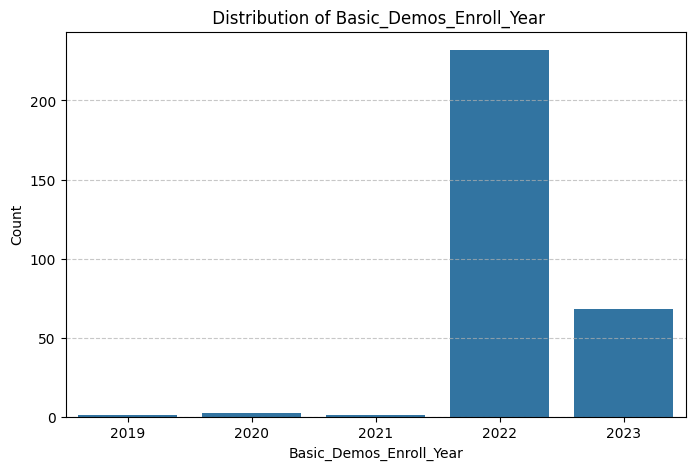

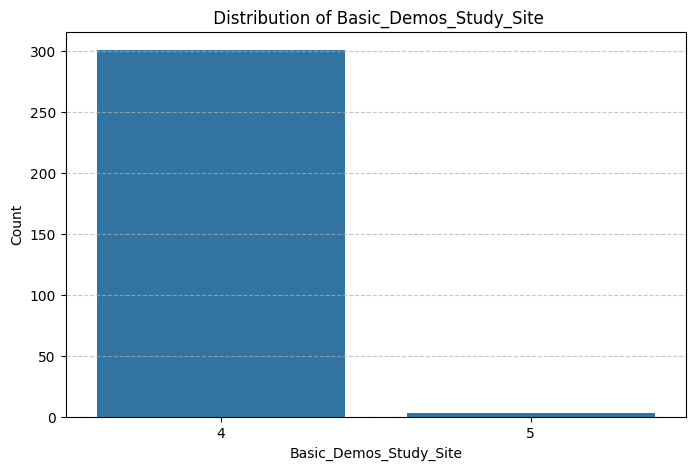

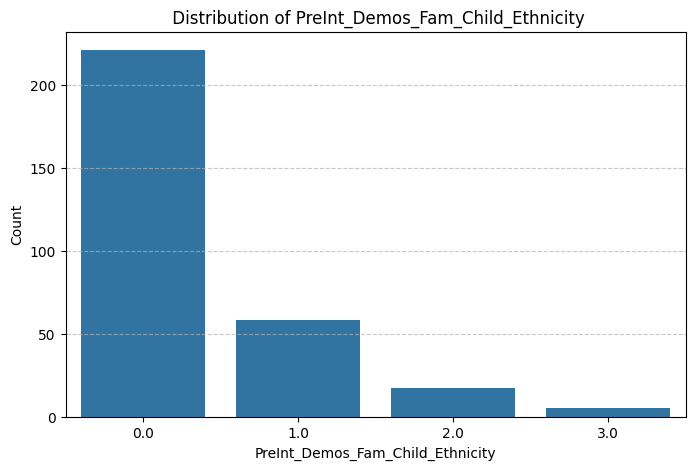

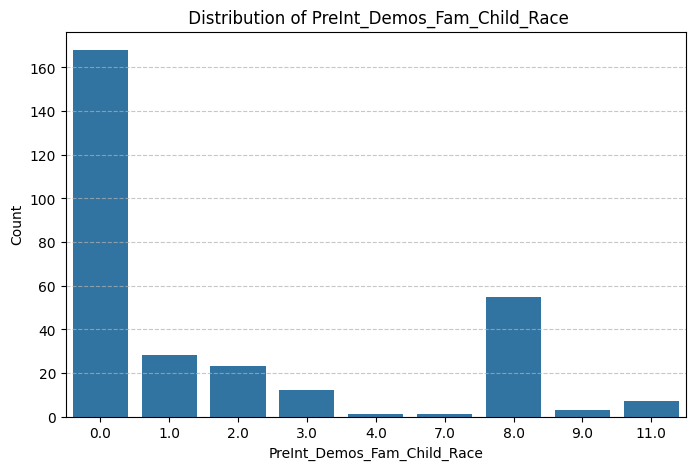

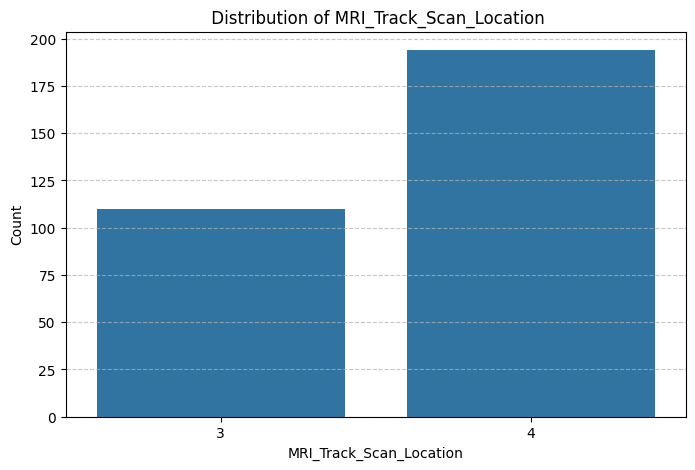

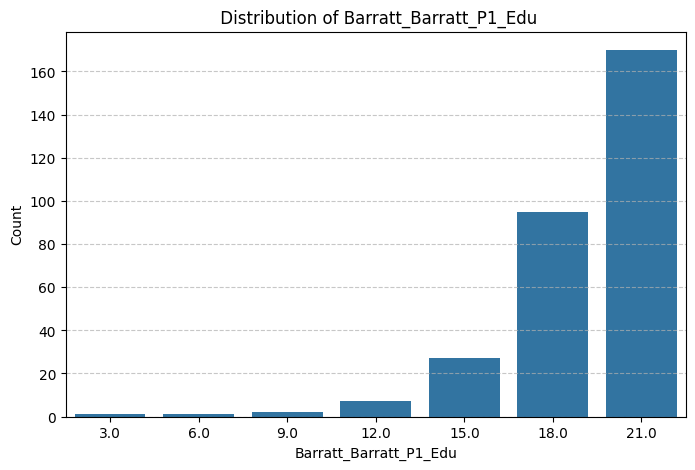

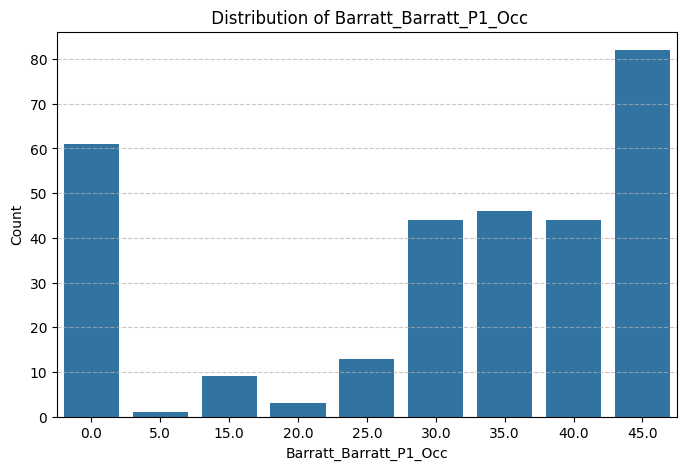

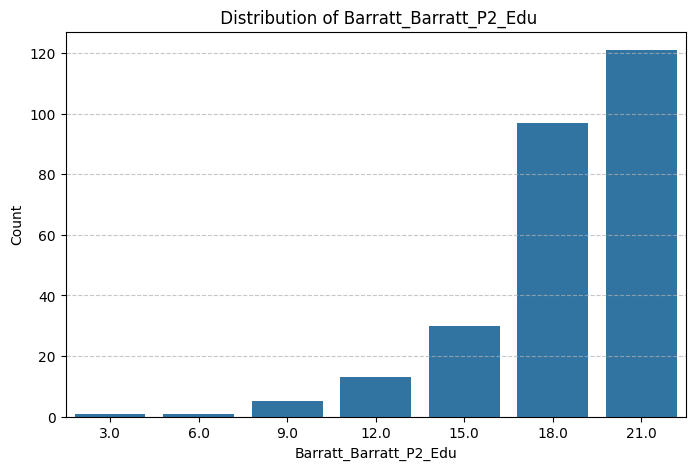

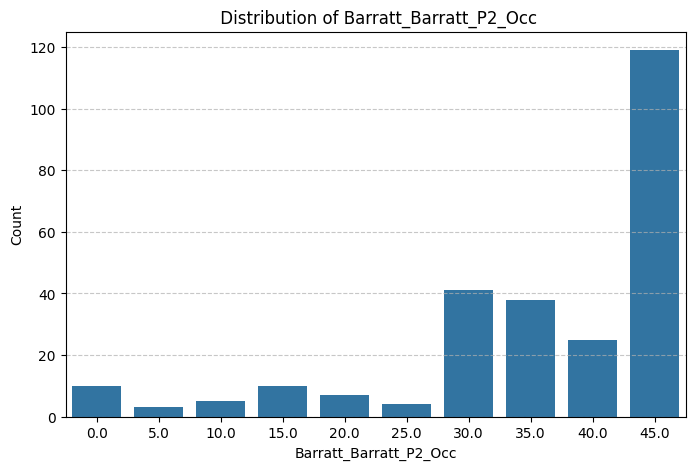

In [47]:
for col in test_categorical.columns:
  if test_categorical[col].dtype == 'int' or test_categorical[col].dtype =='float':
    plt.figure(figsize=(8, 5))
    sns.countplot(x = test_categorical[col])
    plt.title(f" Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [48]:
test_categorical.isna().sum()

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,3
PreInt_Demos_Fam_Child_Race,6
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,1
Barratt_Barratt_P1_Occ,1
Barratt_Barratt_P2_Edu,36
Barratt_Barratt_P2_Occ,42


In [49]:
test_categorical.isna().sum()

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,3
PreInt_Demos_Fam_Child_Race,6
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,1
Barratt_Barratt_P1_Occ,1
Barratt_Barratt_P2_Edu,36
Barratt_Barratt_P2_Occ,42


In [50]:
#fixing NA
test_categorical['PreInt_Demos_Fam_Child_Ethnicity'] = test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(2.0)
#fixing the rest with the mean
for col in test_categorical.columns:
    if test_categorical[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_categorical[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_categorical[col] = test_categorical[col].fillna(test_categorical[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [51]:
test_categorical.isna().sum().sum()

np.int64(0)

In [52]:
#encoding categorical
for col in test_categorical.select_dtypes(include='int').columns:
  test_categorical[col]= test_categorical[col].astype('category')

#encoding varibales
test_cat_encoded = pd.get_dummies(test_categorical[cols_encode],drop_first=True)
test_cat_encoded = test_cat_encoded.applymap(lambda x:1 if x is True else(0 if x is False else x))

#testing if test and train categorical have same columns
missing_cols = set(train_categorical_copy.columns) - set(test_cat_encoded.columns)
for col in missing_cols:
  test_cat_encoded[col]=0

#want to make sure same order
test_cat_encoded = test_cat_encoded.reindex(columns=train_categorical_encoded.columns, fill_value=0)

#final encoded df
final_test_cat = pd.concat([test_categorical.drop(columns=cols_encode), test_cat_encoded], axis=1)
final_test_cat.head()

<ipython-input-52-3736ff033e07>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_cat_encoded = test_cat_encoded.applymap(lambda x:1 if x is True else(0 if x is False else x))


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test connectome and Quantative

In [53]:
test_functional_connectome.isna().sum().sum()

np.int64(0)

In [54]:
test_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,1
ColorVision_CV_Score,9
APQ_P_APQ_P_CP,15
APQ_P_APQ_P_ID,15
APQ_P_APQ_P_INV,15
APQ_P_APQ_P_OPD,15
APQ_P_APQ_P_PM,15
APQ_P_APQ_P_PP,15
SDQ_SDQ_Conduct_Problems,30


In [55]:
test_merge = pd.merge(final_test_cat,test_quantitative,on= 'participant_id')
test_merge.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [56]:
finalized_TEST_df = pd.merge(test_merge,test_functional_connectome, on='participant_id')
finalized_TEST_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [57]:
finalized_TEST_df.to_csv("Merged_test_df.csv",index=False)

In [58]:
finalized_TRAIN_df.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19930)

In [63]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Loading
sample_submission_path = "/mnt/data/SAMPLE_SUBMISSION (2).xlsx"
df_sample_submission = pd.read_excel('/content/drive/MyDrive/TRAIN/SAMPLE_SUBMISSION.xlsx')

# Features and targets
X = df_sample_submission.drop(columns=["participant_id", "ADHD_Outcome"])  # Keep relevant features
y = df_sample_submission[["ADHD_Outcome", "Sex_F"]]
participant_ids = df_sample_submission[["participant_id"]]

# Create pipeline with scaling and model training
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', MultiOutputClassifier(LogisticRegression(max_iter=500)))
])

# Train-test split (Optional: for evaluation purposes)
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, participant_ids, test_size=0.2, random_state=42
)

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting
y_pred_full = pipeline.predict(X)

# Convert predictions to DataFrame
y_pred_full_df = pd.DataFrame(y_pred_full, columns=["ADHD_Outcome", "Sex_F"])

# Concatenate participant_id with predictions
output_full_df = pd.concat([participant_ids, y_pred_full_df], axis=1)

# Rearrange columns to match submission order
output_full_df = output_full_df[["participant_id", "ADHD_Outcome", "Sex_F"]]

# Calculate accuracy for the entire dataset
overall_accuracy = accuracy_score(y, y_pred_full_df)

# Print overall accuracy
print(f"Overall Accuracy: {overall_accuracy}")


Overall Accuracy: 0.5427631578947368


In [64]:
# Save the final dataframe to a csv
output_full_df.to_csv("predictions_full.csv", index=False)

# Confirm the download
print("The predictions have been saved as 'predictions_full.csv'")

print(output_full_df)

The predictions have been saved as 'predictions_full.csv'
    participant_id  ADHD_Outcome  Sex_F
0     Cfwaf5FX7jWK             1      0
1     vhGrzmvA3Hjq             1      0
2     ULliyEXjy4OV             0      1
3     LZfeAb1xMtql             1      0
4     EnFOUv0YK1RG             1      0
..             ...           ...    ...
299   UadZfjdEg7eG             1      0
300   IUEHiLmQAqCi             0      1
301   cRySmCadYFRO             1      0
302   E3MvDUtJadc5             1      0
303   dQJXfyRazknD             1      0

[304 rows x 3 columns]
